In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np 
import datetime
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , RobustScaler, MaxAbsScaler,MinMaxScaler,OneHotEncoder, LabelEncoder
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold,RepeatedStratifiedKFold,StratifiedKFold,train_test_split,GridSearchCV,cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from skopt import BayesSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import sklearn
sns.set(font_scale = 1.5, style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')
sklearn.set_config(display = 'diagram')
np.random.seed(seed = 42)

In [9]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings(action = 'ignore')

# DATA IMPORTING

In [10]:
turbo_2023avq = pd.read_csv('turbo_2023 avgust.csv')
turbo_2023avq.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,1,64600,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox


In [11]:
turbo_2023sen=pd.read_csv('turbo_2023 sentyabr.csv')
turbo_2023sen.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,yox,7200,bakı,daewoo,lanos,2009,sedan,boz,260000,mexaniki,ön,xeyr,NaN,1.5,86,benzin,NaN,NaN,var,yox,yox,yox,var,yox,var,yox,yox,yox,yox,var,yox
1,yox,12600,xudat,ford,transit,1998,furqon,qırmızı,250000,mexaniki,arxa,xeyr,NaN,2.5,76,dizel,NaN,NaN,yox,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox


In [12]:
turbo_2023okt=pd.read_csv('turbo_2023 oktyabr.csv')
turbo_2023okt.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,45050,bakı,ford,mustang,2018,kupe,boz,56200,avtomat,arxa,xeyr,13.10.2023,NaN,2.3,309,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,var,var,yox,var
1,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,26.09.2023,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [13]:
turbo_2023may=pd.read_csv('turbo_2023may.csv')
turbo_2023may.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,3000,bakı,lada (vaz),2106,1990,sedan,qəhvəyi,120000,mexaniki,arxa,xeyr,28.05.2023,rusiya,1.6,75,benzin,vuruğu yoxdur,rənglənməyib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,208250,bakı,land rover,defender,2021,offroader / suv,qara,15000,avtomat,tam,xeyr,28.05.2023,NaN,3.0,400,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [14]:
turbo_2023nov1=pd.read_csv('turbo_2023 noyabr-1.csv')
turbo_2023nov1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,60010,bakı,mercedes,sprinter 316,2014,mikroavtobus,ağ,250000,mexaniki,arxa,xeyr,06.11.2023,NaN,2.2,163,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,yox,yox,var,yox
1,1,133450,bakı,land rover,rr evoque,2017,offroader / suv,boz,0,avtomat,tam,bəli,07.11.2023,NaN,2.0,240,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,yox,var


In [15]:
turbo_2023nov2=pd.read_csv('turbo_2023 noyabr-2.csv')
turbo_2023nov2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,34000,bakı,mercedes,s 420,1986,sedan,göy,325000,avtomat,arxa,xeyr,18.11.2023,NaN,4.2,218,benzin,NaN,NaN,var,var,var,yox,var,yox,var,yox,var,yox,yox,yox,yox
1,1,98260,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,19.11.2023,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox


In [16]:
turbo_2022sent=pd.read_csv('turbo_2022sent.csv')
turbo_2022sent.head(2)

,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,yürüş,sürətlər_qutusu,ötürücü,yeni,qiymet,yeniləndi,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,hansı_bazar_üçün_yığılıb,vuruğu_var,rənglənib
0,bakı,lada (vaz),2107,1998,sedan,ağ,1.6,75,benzin,200000,mexaniki,ön,xeyr,3700,2022-10-22,var,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,yox,NaN,NaN,NaN
1,bakı,bmw,530,2018,sedan,ağ,2.0,245,benzin,45000,avtomat,arxa,xeyr,91630,2022-10-25,var,yox,yox,var,var,var,var,var,var,var,var,var,yox,NaN,NaN,NaN


In [17]:
turbo_soldout=pd.read_csv('soldout.csv')
turbo_soldout.head(2)

,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,kredit,yeniləndi,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,12500.0,xırdalan,nissan,sunny,2008,sedan,qara,345000,avtomat,ön,1.6,120,benzin,xeyr,08.11.2023,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,yox,var,yox,yox,var,NaN,NaN,NaN
1,8000.0,qəbələ,honda,cr-v,1999,offroader / suv,göy,218321,avtomat,tam,2.0,148,benzin,xeyr,19.10.2023,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,NaN,NaN,NaN


In [18]:
turbo_2023_dekabr1=pd.read_csv('turbo_2023 dekabr-1.csv')
turbo_2023_dekabr1.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,11850,bakı,volkswagen,caddy,2010,minivan,yaşıl,258000,mexaniki,tam,xeyr,01.12.2023,NaN,1.6,102,benzin,NaN,NaN,yox,var,yox,var,var,yox,var,yox,yox,yox,yox,yox,yox
1,0,72250,bakı,jeep,wrangler,2015,offroader / suv,qara,17500,avtomat,tam,xeyr,01.12.2023,NaN,3.6,286,benzin,NaN,NaN,var,var,yox,var,var,var,var,var,var,var,var,yox,yox


In [19]:
turbo_2023_dekabr2=pd.read_csv('turbo_2023 dekabr-2.csv')
turbo_2023_dekabr2.head(2)

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,yeniləndi,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,0,72250,bakı,jeep,wrangler,2015,offroader / suv,qara,17500,avtomat,tam,xeyr,11.12.2023,NaN,3.6,286,benzin,NaN,NaN,var,var,yox,var,var,var,var,var,var,var,var,yox,yox
1,1,75650,bakı,lexus,rx 300,2020,offroader / suv,ağ,72000,avtomat,tam,xeyr,11.12.2023,rəsmi diler,2.0,238,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,yox,var


In [21]:
merged_turbo_data=pd.concat([turbo_2023avq,turbo_2023may,turbo_2022sent,turbo_soldout,turbo_2023sen,turbo_2023okt,turbo_2023nov1,turbo_2023nov2,turbo_2023_dekabr1,turbo_2023_dekabr2])
merged_turbo_data.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,98260.0,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
1,1,64600.0,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox,NaN
2,1,12800.0,sumqayıt,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,xeyr,NaN,20.08.2023,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox,NaN
3,0,44200.0,bakı,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,xeyr,NaN,20.08.2023,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
4,0,45050.0,bakı,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,xeyr,NaN,19.08.2023,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,NaN


In [22]:
merged_turbo_data=merged_turbo_data.loc[merged_turbo_data['qiymet']>1000]
merged_turbo_data.head()

,avtosalon,qiymet,şəhər,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,yeni,hansı_bazar_üçün_yığılıb,yeniləndi,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,kredit
0,1,98260.0,bakı,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,bəli,rəsmi diler,16.08.2023,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
1,1,64600.0,bakı,toyota,camry,2020,sedan,qara,0,avtomat,ön,bəli,NaN,28.07.2023,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox,NaN
2,1,12800.0,sumqayıt,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,xeyr,NaN,20.08.2023,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox,NaN
3,0,44200.0,bakı,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,xeyr,NaN,20.08.2023,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox,NaN
4,0,45050.0,bakı,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,xeyr,NaN,19.08.2023,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var,NaN


In [23]:
merged_turbo_data = merged_turbo_data.drop(columns = ['şəhər','avtosalon','kredit','yeni','yeniləndi'])

In [24]:
merged_turbo_data =merged_turbo_data.drop_duplicates()
merged_turbo_data 

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2.5,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1.5,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3.6,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4.7,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,12500.0,nissan,teana,2006,sedan,gümüşü,307500,avtomat,ön,NaN,2.3,173,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,yox,var,yox,var,yox,yox,yox,var,yox,yox
9954,26300.0,kia,sorento,2009,offroader / suv,qara,229000,avtomat,ön,NaN,2.0,184,dizel,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var
9955,14900.0,chevrolet,cobalt,2014,sedan,tünd qırmızı,161000,avtomat,ön,rəsmi diler,1.5,105,benzin,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,yox,yox,var,yox,yox
9956,34900.0,kia,k7,2016,sedan,yaş asfalt,176000,avtomat,ön,NaN,2.2,202,dizel,vuruğu yoxdur,rənglənməyib,var,var,yox,var,var,var,var,var,var,var,var,var,var


In [25]:
merged_turbo_data.mühərrik_hecmi = merged_turbo_data.mühərrik_hecmi.apply(lambda x: x*1000)
merged_turbo_data.head()

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,jaguar,xf,2019,sedan,qara,0,avtomat,arxa,rəsmi diler,2000.0,250,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
1,64600.0,toyota,camry,2020,sedan,qara,0,avtomat,ön,NaN,2500.0,181,benzin,NaN,NaN,var,var,var,var,var,var,var,yox,var,var,var,yox,yox
2,12800.0,baic,a1,2014,sedan,yaş asfalt,103000,avtomat,ön,NaN,1500.0,115,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,yox,yox,yox,yox,var,yox
3,44200.0,porsche,panamera 4,2013,liftbek,göy,160000,avtomat,tam,NaN,3600.0,300,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,yox
4,45050.0,mercedes,s 500,2012,sedan,qara,104000,avtomat,tam,NaN,4700.0,435,benzin,vuruğu yoxdur,rənglənməyib,var,var,var,var,var,var,var,var,var,var,var,var,var


In [26]:
for col in merged_turbo_data.select_dtypes(include='object'):
    merged_turbo_data[col] = merged_turbo_data[col].str.strip()
    merged_turbo_data[col] = merged_turbo_data[col].str.capitalize()
merged_turbo_data

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,Jaguar,Xf,2019,Sedan,Qara,0,Avtomat,Arxa,Rəsmi diler,2000.0,250,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Yox
1,64600.0,Toyota,Camry,2020,Sedan,Qara,0,Avtomat,Ön,NaN,2500.0,181,Benzin,NaN,NaN,Var,Var,Var,Var,Var,Var,Var,Yox,Var,Var,Var,Yox,Yox
2,12800.0,Baic,A1,2014,Sedan,Yaş asfalt,103000,Avtomat,Ön,NaN,1500.0,115,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Yox,Yox,Yox,Yox,Var,Yox
3,44200.0,Porsche,Panamera 4,2013,Liftbek,Göy,160000,Avtomat,Tam,NaN,3600.0,300,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Yox
4,45050.0,Mercedes,S 500,2012,Sedan,Qara,104000,Avtomat,Tam,NaN,4700.0,435,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,12500.0,Nissan,Teana,2006,Sedan,Gümüşü,307500,Avtomat,Ön,NaN,2300.0,173,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Yox,Var,Yox,Var,Yox,Yox,Yox,Var,Yox,Yox
9954,26300.0,Kia,Sorento,2009,Offroader / suv,Qara,229000,Avtomat,Ön,NaN,2000.0,184,Dizel,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var
9955,14900.0,Chevrolet,Cobalt,2014,Sedan,Tünd qırmızı,161000,Avtomat,Ön,Rəsmi diler,1500.0,105,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Var,Var,Var,Var,Var,Yox,Yox,Var,Yox,Yox
9956,34900.0,Kia,K7,2016,Sedan,Yaş asfalt,176000,Avtomat,Ön,NaN,2200.0,202,Dizel,Vuruğu yoxdur,Rənglənməyib,Var,Var,Yox,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var


In [22]:
#merged_turbo_data.to_csv('merged_turbo_data.csv' ,index=False)

## NOW FIRSTLY SOLVE MOTOSIKLET NA PROBLEM FOR THE ALL DATA

In [27]:
moto_nan_list=merged_turbo_data[merged_turbo_data['ban_növü']=='motosiklet'].iloc[:,18:31].drop(columns=['dəri_salon','yağış_sensoru','kondisioner','oturacaqların_ventilyasiyası']).columns.tolist()

In [28]:
def motosikle_change_nan(data_frame=None):
    for i in moto_nan_list:
        data_frame[i].fillna('yox' , inplace=True)
    return data_frame
merged_turbo_data=motosikle_change_nan(data_frame=merged_turbo_data)
merged_turbo_data.head()

,qiymet,marka,model,buraxılış_ili,ban_növü,rəng,yürüş,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,mühərrik_hecmi,mühərrik_gucu,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,98260.0,Jaguar,Xf,2019,Sedan,Qara,0,Avtomat,Arxa,Rəsmi diler,2000.0,250,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Yox
1,64600.0,Toyota,Camry,2020,Sedan,Qara,0,Avtomat,Ön,NaN,2500.0,181,Benzin,NaN,NaN,Var,Var,Var,Var,Var,Var,Var,Yox,Var,Var,Var,Yox,Yox
2,12800.0,Baic,A1,2014,Sedan,Yaş asfalt,103000,Avtomat,Ön,NaN,1500.0,115,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Yox,Yox,Yox,Yox,Var,Yox
3,44200.0,Porsche,Panamera 4,2013,Liftbek,Göy,160000,Avtomat,Tam,NaN,3600.0,300,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Yox
4,45050.0,Mercedes,S 500,2012,Sedan,Qara,104000,Avtomat,Tam,NaN,4700.0,435,Benzin,Vuruğu yoxdur,Rənglənməyib,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var,Var


<AxesSubplot:>

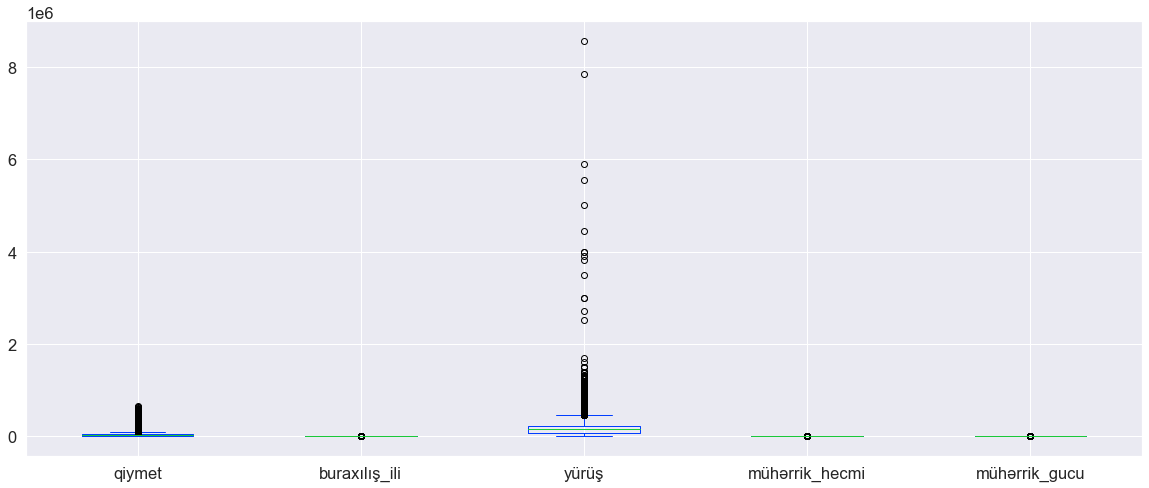

In [29]:
merged_turbo_data.select_dtypes(include='number').plot(kind='box' , vert=True , figsize=(20,8))

# SEPERATE ALL DATA NUMERIC AND CATEGORIC DATA THEN SOLVE NA PROBLEMS

In [30]:
merged_turbo_data.lehimli_disk=merged_turbo_data.lehimli_disk.replace({'Var': 'yes' ,"Yox" : 'o'})
merged_turbo_data['abs']=merged_turbo_data['abs'].replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.lyuk=merged_turbo_data.lyuk.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.yağış_sensoru=merged_turbo_data.yağış_sensoru.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.mərkəzi_qapanma=merged_turbo_data.mərkəzi_qapanma.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.park_radarı=merged_turbo_data.park_radarı.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.kondisioner=merged_turbo_data.kondisioner.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.oturacaqların_isidilməsi=merged_turbo_data.oturacaqların_isidilməsi.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.dəri_salon=merged_turbo_data.dəri_salon.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.ksenon_lampalar=merged_turbo_data.ksenon_lampalar.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.arxa_görüntü_kamerası=merged_turbo_data.arxa_görüntü_kamerası.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.yan_pərdələr=merged_turbo_data.yan_pərdələr.replace({'Var': 'yes' ,"Yox" : 'no'})
merged_turbo_data.oturacaqların_ventilyasiyası=merged_turbo_data.oturacaqların_ventilyasiyası.replace({'Var': 'yes' ,"Yox" : 'no'})

In [31]:
def apply_imputer_categoric(data_frame=None):
    categoric_data = data_frame.select_dtypes(include='object')
    for i in categoric_data.columns:
        categoric_data[i] = SimpleImputer(strategy='most_frequent').fit_transform(categoric_data[i].to_frame())
    return categoric_data
categoric_data = apply_imputer_categoric(data_frame=merged_turbo_data)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,Jaguar,Xf,Sedan,Qara,Avtomat,Arxa,Rəsmi diler,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
1,Toyota,Camry,Sedan,Qara,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,no,no
2,Baic,A1,Sedan,Yaş asfalt,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,no,no,no,no,yes,no
3,Porsche,Panamera 4,Liftbek,Göy,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no
4,Mercedes,S 500,Sedan,Qara,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


In [32]:
def apply_imputer_numeric(data_frame=None):
    numeric_data = data_frame.select_dtypes(include='number')
    for i in numeric_data.columns:
        numeric_data[i] = SimpleImputer(strategy='median').fit_transform(numeric_data[i].to_frame())
    return numeric_data
numeric_data = apply_imputer_numeric(data_frame=merged_turbo_data)
numeric_data.head()

,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,98260.0,2019.0,0.0,2000.0,250.0
1,64600.0,2020.0,0.0,2500.0,181.0
2,12800.0,2014.0,103000.0,1500.0,115.0
3,44200.0,2013.0,160000.0,3600.0,300.0
4,45050.0,2012.0,104000.0,4700.0,435.0


# SOLVE OUTLIER PROBLEM FOR NUMERIC DATA

In [33]:
def found_outliers (data_frame=None):
    numeric_feature=data_frame.select_dtypes(include= 'number').drop(columns=['qiymet','buraxılış_ili']).columns.tolist()
    selected_feature=[]
    
    for i in numeric_feature:
        z_score = np.where(np.abs(stats.zscore(data_frame[i], nan_policy='omit')) >= 3, 1, 0)
        
        if 1 in z_score:
            selected_feature.append(i)
        else:
            pass
    return selected_feature

In [34]:
from scipy import stats
features=found_outliers(numeric_data)
features

['yürüş', 'mühərrik_hecmi', 'mühərrik_gucu']

In [35]:
def clean_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    # IQR hesapla
    IQR = Q3 - Q1
    # Alt ve üst sınırları hesapla
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Aykırı değerleri alt ve üst sınırlara eşitle
    data[column_name] = data[column_name].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return data

In [36]:
numeric_data=clean_outliers(data=numeric_data,column_name='yürüş')

In [37]:
numeric_data=clean_outliers(data=numeric_data,column_name='mühərrik_hecmi')

In [38]:
numeric_data=clean_outliers(data=numeric_data,column_name='mühərrik_gucu')

<AxesSubplot:>

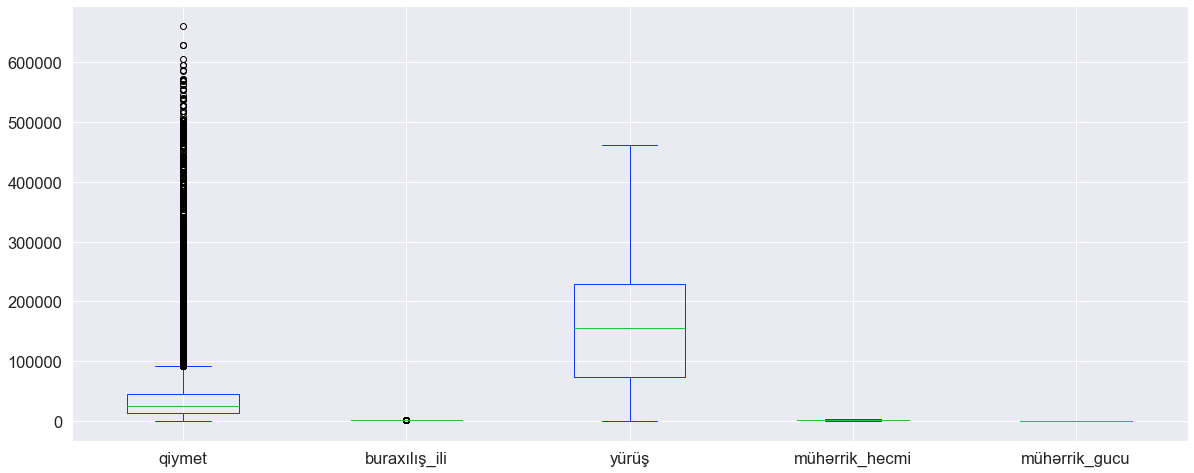

In [39]:
numeric_data.plot(kind='box' , vert=True , figsize=(20,8))

In [40]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,Jaguar,Xf,Sedan,Qara,Avtomat,Arxa,Rəsmi diler,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,98260.0,2019.0,0.0,2000.0,250.0
1,Toyota,Camry,Sedan,Qara,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,no,yes,yes,yes,no,no,64600.0,2020.0,0.0,2500.0,181.0
2,Baic,A1,Sedan,Yaş asfalt,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,no,no,no,no,yes,no,12800.0,2014.0,103000.0,1500.0,115.0
3,Porsche,Panamera 4,Liftbek,Göy,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,44200.0,2013.0,160000.0,3600.0,300.0
4,Mercedes,S 500,Sedan,Qara,Avtomat,Tam,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,45050.0,2012.0,104000.0,3850.0,415.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,Nissan,Teana,Sedan,Gümüşü,Avtomat,Ön,Avropa,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,no,yes,no,yes,no,no,no,yes,no,no,12500.0,2006.0,307500.0,2300.0,173.0
9954,Kia,Sorento,Offroader / suv,Qara,Avtomat,Ön,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,26300.0,2009.0,229000.0,2000.0,184.0
9955,Chevrolet,Cobalt,Sedan,Tünd qırmızı,Avtomat,Ön,Rəsmi diler,Benzin,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,no,no,14900.0,2014.0,161000.0,1500.0,105.0
9956,Kia,K7,Sedan,Yaş asfalt,Avtomat,Ön,Avropa,Dizel,Vuruğu yoxdur,Rənglənməyib,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,34900.0,2016.0,176000.0,2200.0,202.0


In [41]:
merged_data.to_csv('lastdata.csv',index = False)

In [42]:
merged_data.isna().sum()

marka                           0
model                           0
ban_növü                        0
rəng                            0
sürətlər_qutusu                 0
ötürücü                         0
hansı_bazar_üçün_yığılıb        0
yanacaq_novu                    0
vuruğu_var                      0
rənglənib                       0
lehimli_disk                    0
abs                             0
lyuk                            0
yağış_sensoru                   0
mərkəzi_qapanma                 0
park_radarı                     0
kondisioner                     0
oturacaqların_isidilməsi        0
dəri_salon                      0
ksenon_lampalar                 0
arxa_görüntü_kamerası           0
yan_pərdələr                    0
oturacaqların_ventilyasiyası    0
qiymet                          0
buraxılış_ili                   0
yürüş                           0
mühərrik_hecmi                  0
mühərrik_gucu                   0
dtype: int64

# ENCODING PROCESS FOR CATEGORIC DATA

In [43]:
def label_encoder_process(data_frame=None):
    for i in data_frame.columns:
        lb = LabelEncoder()
        data_frame[i]=lb.fit_transform(data_frame[i])
    return data_frame
categoric_data=label_encoder_process(categoric_data)
categoric_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası
0,67,1546,17,8,0,0,6,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,141,389,17,8,0,2,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0
2,7,234,17,15,0,2,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0
3,114,1095,8,4,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,96,1256,17,8,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# MERGE ALL READY DATA (NUMERIC / CATEGORIC)

In [44]:
merged_data=pd.concat([categoric_data,numeric_data] , axis=1)
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,67,1546,17,8,0,0,6,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,98260.0,2019.0,0.0,2000.0,250.0
1,141,389,17,8,0,2,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,64600.0,2020.0,0.0,2500.0,181.0
2,7,234,17,15,0,2,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,12800.0,2014.0,103000.0,1500.0,115.0
3,114,1095,8,4,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,44200.0,2013.0,160000.0,3600.0,300.0
4,96,1256,17,8,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,45050.0,2012.0,104000.0,3850.0,415.5


In [45]:
merged_data=merged_data.sort_values(by='buraxılış_ili').reset_index().drop(columns='index')
merged_data.head()

,marka,model,ban_növü,rəng,sürətlər_qutusu,ötürücü,hansı_bazar_üçün_yığılıb,yanacaq_novu,vuruğu_var,rənglənib,lehimli_disk,abs,lyuk,yağış_sensoru,mərkəzi_qapanma,park_radarı,kondisioner,oturacaqların_isidilməsi,dəri_salon,ksenon_lampalar,arxa_görüntü_kamerası,yan_pərdələr,oturacaqların_ventilyasiyası,qiymet,buraxılış_ili,yürüş,mühərrik_hecmi,mühərrik_gucu
0,41,943,17,8,1,0,1,0,1,1,1,1,1,1,2,2,1,2,1,2,2,2,0,190400.0,1939.0,90000.0,2400.000000,100.0
1,41,943,17,8,1,0,1,0,1,1,1,1,1,1,2,2,1,2,1,2,2,2,0,166600.0,1939.0,90000.0,2400.000000,100.0
2,41,192,13,16,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,2,2,0,3200.0,1946.0,100000.0,2099.999905,55.0
3,41,192,13,16,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,2,2,0,3200.0,1946.0,100000.0,2100.000000,55.0
4,102,118,17,9,1,0,5,0,1,1,1,1,1,1,2,2,1,2,1,2,2,2,0,10200.0,1952.0,41276.0,1600.000000,75.0


# REGRESSION MODEL

In [46]:
X = merged_data.drop(columns=['qiymet'])
Y = merged_data['qiymet']

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X, Y, test_size=0.2,random_state=42)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38040, 27), (9510, 27), (38040,), (9510,))

In [49]:
xgb_model= XGBRegressor()
xgb_model.fit(X_train,y_train)
prediction = xgb_model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
mae = mean_absolute_error(y_test, prediction)
train_r2 = r2_score(y_test, prediction)
test_r2 = r2_score(y_test, prediction)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Train R-squared (R2) Score:", train_r2)
print('Test R-squared (R2) Score:',test_r2)

Mean Squared Error (MSE): 78880484.22806469
Root Mean Squared Error (RMSE): 8881.468585096987
Mean Absolute Error (MAE): 4097.113010394461
Train R-squared (R2) Score: 0.9686041724954578
Test R-squared (R2) Score: 0.9686041724954578


In [51]:
%%time 

rkf = RepeatedStratifiedKFold(random_state = 42)

cross_validation = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, scoring = 'r2',cv = rkf,n_jobs = -1)
max_score = cross_validation[cross_validation.argmax()] 
min_score = cross_validation[cross_validation.argmin()]
average_score = cross_validation.mean()
std_score = cross_validation.std()

print(f'Cross validation summary for the Regressor:\n')
print(f'Standard Deviation: {std_score:.2f}')
print(f'Average R2: {average_score:.2f}')
print(f'Maximum R2: {max_score: .2f}')
print(f'Minimum R2 : {min_score: .2f}')

Cross validation summary for the Regressor:

Standard Deviation: 0.01
Average R2: 0.96
Maximum R2:  0.98
Minimum R2 :  0.94
CPU times: total: 2.12 s
Wall time: 1min 3s


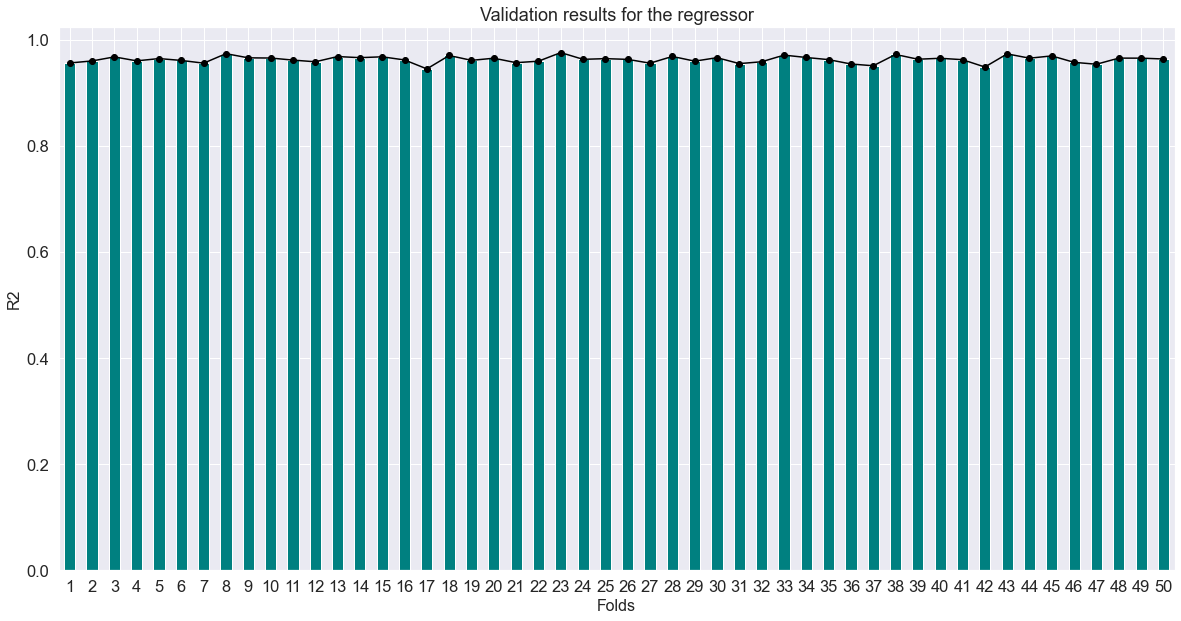

In [52]:
plt.figure(figsize = (20,10))
plt.plot(cross_validation,marker = 'o',color = 'black')
pd.Series(data = cross_validation).plot(kind = 'bar',color = 'teal')
plt.title(label  = 'Validation results for the regressor')
plt.xlabel(xlabel = 'Folds',fontsize = 16)
plt.ylabel(ylabel = 'R2', fontsize = 16)
plt.xticks(ticks = range(cross_validation.size),labels = range(1,cross_validation.size + 1),rotation = 0)
plt.show()

In [53]:
import pickle
with open('saved_model.pickle', 'wb') as pickled_file:
    pickle.dump(xgb_model, pickled_file)

In [54]:
predicted_data=pd.DataFrame(prediction ,columns=['Predicted'])

actual_data=pd.DataFrame(y_test)
actual_data=actual_data.rename(columns={'qiymet':'Actual_value'}).reset_index()['Actual_value']

compare_2_data=pd.concat([predicted_data,actual_data],axis=1)
compare_2_data.head(10)

,Predicted,Actual_value
0,20453.091797,23700.0
1,37152.148438,38930.0
2,38880.507812,48960.0
3,13118.427734,14900.0
4,15187.652344,13900.0
5,13953.368164,17500.0
6,4581.247070,6300.0
7,13888.190430,13200.0
8,11966.769531,12600.0
9,11067.186523,12000.0
